In [1]:
# Load the Tidyverse

 library('tidyverse')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Use the `pull` function to extract the `class` column from the `mpg` data set. Capture this column into a variable named `class_col`.

In [2]:
class_col=mpg%>%pull(class)


Run the code below to turn `class_col` into a factor and view the default levels.

In [3]:
class_col %>% factor %>% levels

[1] "2seater"    "compact"    "midsize"    "minivan"    "pickup"    
[6] "subcompact" "suv"

Let's turn `class_col` into a factor but manipulate the order of the levels with `forcats`!

First, use the `table` command to count the frequency of each value in `class_col`.

In [4]:
class_col %>% table

.
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 

Pipe `class_col` into the `fct_infreq` function to turn `class_col` into a factor and order the levels by ☝️frequency. Are the levels in the order you expected?

In [5]:
class_col%>% fct_infreq()%>%levels

[1] "suv"        "compact"    "midsize"    "subcompact" "pickup"    
[6] "minivan"    "2seater"

Group the low frequency levels into an "Other" category using `fct_lump`. Set the `n` argument to **five**.

In [6]:
class_col%>% fct_lump(n=5)%>%levels

[1] "compact"    "midsize"    "pickup"     "subcompact" "suv"       
[6] "Other"

## Bonus

Can you group low frequency values and sort the levels by frequency?

In [7]:
class_col%>% fct_lump(n=5)%>%fct_infreq()%>%levels

[1] "suv"        "compact"    "midsize"    "subcompact" "pickup"    
[6] "Other"

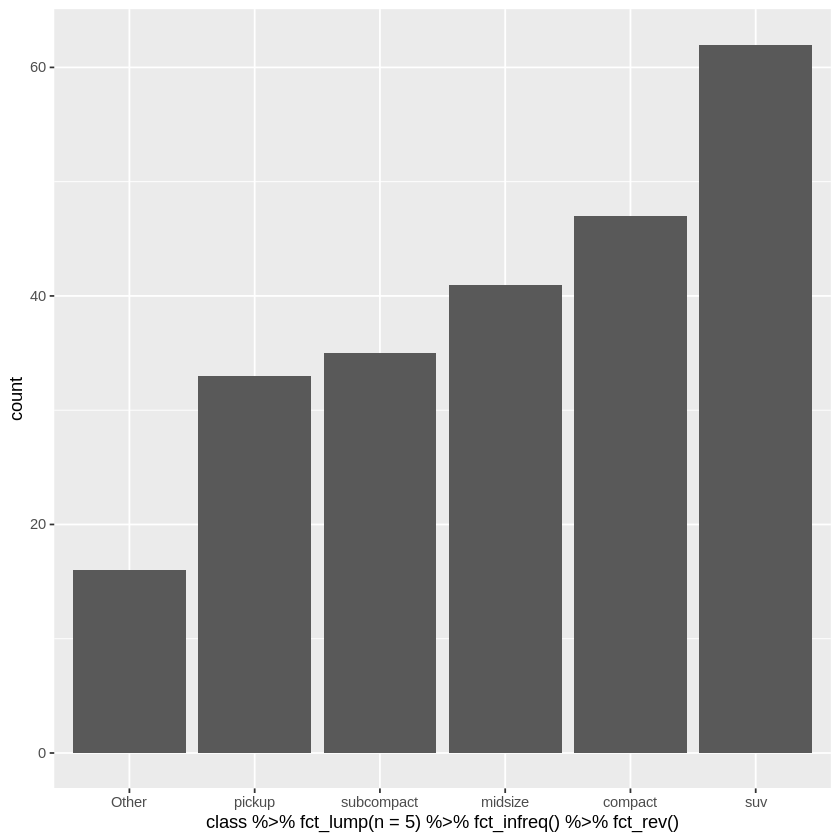

In [11]:
p=ggplot(mpg,aes(x=class%>%fct_lump(n=5)%>%fct_infreq()%>% fct_rev()))
p=p+geom_bar()
p